#Paquetes necesarios

In [23]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
import sys

Carga imagen y convierte a RGB

In [28]:
#Carga imagen ejemplo con monedas
img = cv2.imread('Monedas.jpg') 
print(img.shape)
#Recordar que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

[ WARN:0@3059.297] global loadsave.cpp:241 findDecoder imread_('Monedas.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

Convierte a gris y muestra histograma

In [29]:
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])

plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(img_gris, cmap='gray')

# Histograma sin normalizar
plt.subplot(1, 2, 2)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])
# Separo subplots horizontalmente
plt.subplots_adjust(wspace=0.4)

error: OpenCV(4.10.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Cuenta elementos tras umbralizar

Umbral fijo usado  200.0
Umbral Otsu  204.0


Text(0.5, 1.0, 'OTSU invertida')

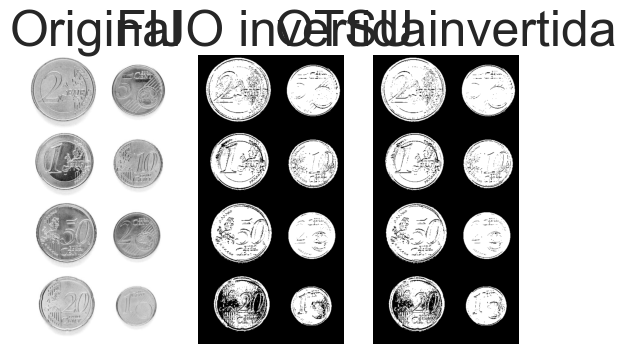

In [30]:
#Dos variantes de umbralizado. Probar otros parámetros, aplicar filtro previo, etc.
umbral = 200 # Prueba varios comenzando en 130
# Umbralizado binario invertido, dado que por defecto se asume objetos en blanco
th1,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
print('Umbral fijo usado ', th1)
# Umbralizado con método de Otsu para selección automática del umbral
th2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print('Umbral Otsu ', th2)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')



Búsqueda de componentes y sus contornos

In [31]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con  figura en blanco y fondo negro
#La imagen de entrada debe ser de un canal y 8 bits excepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales (contornos contenidos en otros)

#Obtiene todos los contornos: externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )

#Dibuja sobre la imagen de entrada los contornos en verde
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 3)

plt.subplot(131)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Todos los contornos')

#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

#Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Externos')

#Dibuja contornos externos rellenos en imagen vacía
#Imagen negra
img_cont = np.zeros(img_rgb.shape)
#Recorre los contornos externos
for c in contornos2:
    #Área del contorno
    area = cv2.contourArea(c)
    #Área mínima (útil filtrar en ocasiones)
    if area > 10:
        #Perímetro del contorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que contiene al contorno
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada al contorno, exgigiendo un mínimo de puntos del contornos
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            #Para determinadas tareas nos puede interesará mostrar los valores obtenidos del contorno
            #print(area, perimetro, rect, cx,cy,radio, elipse)

        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()


error: OpenCV(4.10.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Alternativa contando círculos utilizando la Transformada de Hough. La selección de parámetros puede ser "divertida", más [información](https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


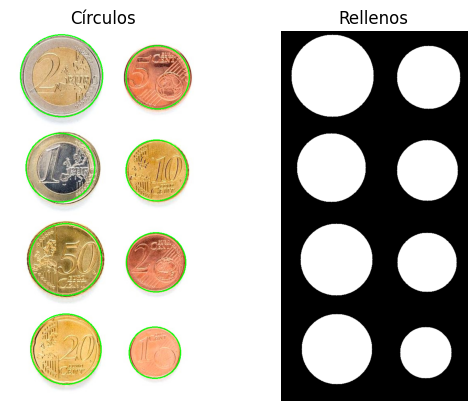

In [6]:
#Conversión a gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza imagen (elimina altas frecuencias)
pimg = cv2.medianBlur(gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # valor del gradiente
        param2=50, # umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada e imagen vacía
img_cont = np.zeros(img_rgb.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()

Las formas localizadas tienen distintas características geométricas, que pueden estimarse a partir de sus contornos. Más infromatión en la [documentación de OpenCV](https://docs.opencv.org/4.x/dd/d49/tutorial_py_contour_features.html).

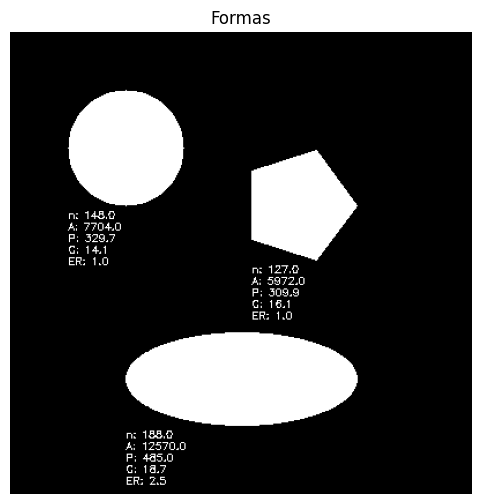

In [7]:
#Creación de polígono regular
def poligono_regular(image, ctr, radio, lados, color):
    pts = []
    ang_step = 2 * np.pi / lados
    for i in range(lados):
        ang = i * ang_step
        x = int(ctr[0] + radio * np.cos(ang))
        y = int(ctr[1] + radio * np.sin(ang))
        pts.append((x, y))
    pts = np.array(pts, np.int32)
    #regorganiza
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(image, [pts], color=color)

# Imagen vacía
img = np.zeros((400, 400, 1), dtype="uint8")
color = (255, 255, 255)

# Formas básicas
cv2.circle(img, (100, 100), 50, color, -1)  # Circular
poligono_regular(img, (250, 150), 50, 5, color)  # Polígono regular
cv2.ellipse(img, (200, 300), (100, 40), 0, 0, 360, color, -1)  # Elíptica

# Localiza contornos
contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Parámeros texto
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.3
thickness = 1

# Process each contour to calculate compactness and ellipse ratio (if possible)
for c in contours:
    # Puntos del contorno
    clon = len(c)

    # Área y perímetro
    area = cv2.contourArea(c)
    perimetro = cv2.arcLength(c, True)

    #Contenedor alineado con ejes de la imagen
    x,y,w,h = cv2.boundingRect(c)
    
    # Compactness: 4*pi*Area/Perimeter^2
    if perimetro > 0:
        compacidad = (perimetro ** 2) / area
    else:
        compactness = 0
    
    # Ajusta elipse si hay suficientes puntos
    if clon >= 5:
        elipse = cv2.fitEllipse(c)
        (center, axes, orientation) = elipse
        major_axis = max(axes)
        minor_axis = min(axes)
        elipse_ratio = major_axis / minor_axis
    else:
        elipse_ratio = None
    
    # Muestra valores en imageb
    cv2.putText(img, f"n: {clon:.1f}", (x, int(y+h+10)), font, font_scale, (255, 255, 255), thickness)
    cv2.putText(img, f"A: {area:.1f}", (x, int(y+h+20)), font, font_scale, (255, 255, 255), thickness)
    cv2.putText(img, f"P: {perimetro:.1f}", (x, int(y+h+30)), font, font_scale, color, thickness)
    cv2.putText(img, f"C: {compacidad:.1f}", (x, int(y+h+40)), font, font_scale, color, thickness)
    cv2.putText(img, f"ER: {elipse_ratio:.1f}", (x, int(y+h+50)), font, font_scale, color, thickness)
    
# Visualiza la imagen
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Formas")
plt.axis('off')
plt.show()


TAREA 1: Captura una o varias imágenes con monedas no solapadas. Tras visualizar la imagen, identifica de forma interactiva (por ejemplo haciendo clic en la imagen) una moneda de un valor determinado en la imagen (por ejemplo de 1€). Tras ello, la tarea se resuelve mostrando por pantalla el número de monedas y la cantidad de dinero presentes en la imagen. No hay restricciones sobre utilizar medidas geométricas o de color. ¿Qué problemas han observado?

Nota: Para establecer la correspondencia entre píxeles y milímetros, comentar que la moneda de un euro tiene un diámetro de 23.25 mm. la de 50 céntimos de 24.35, la de 20 céntimos de 22.25, etc. 

Extras: Considerar que la imagen pueda contener objetos que no son monedas y/o haya solape entre las monedas. Demo en vivo.



In [36]:
# Carga la imagen de las monedas con fondo ruidoso
img = cv2.imread('Monedas.jpg')

# Convertimos la imagen a escala de grises
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gris_eq = cv2.equalizeHist(img_gris)

#Dos variantes de umbralizado. Probar otros parámetros, aplicar filtro previo, etc.
umbral = 150 # Prueba varios comenzando en 130

# Umbralizado binario invertido, dado que por defecto se asume objetos en blanco
th1,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu para selección automática del umbral
th2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


contornos_redondos = []
diametros_monedas = []

# Aplicar un suavizado Gaussiano para eliminar el ruido antes de la detección de contornos
img_blur = cv2.GaussianBlur(img_th2, (5, 5), 0)


# Obtiene todos los contornos: externos e internos
contornos, hierarchy = cv2.findContours(
    img_blur, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )

# Dibuja sobre la imagen de entrada los contornos en verde
# Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 3)

valor_inicial = 10.5
print(f"La compra es de {valor_inicial}€")

# Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_blur, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada solo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)



# Dibuja contornos externos rellenos en imagen vacía
# Imagen negra
img_cont = np.zeros(img_rgb.shape, dtype=np.uint8)

# Recorre los contornos externos
for c in contornos2:
    # Área del contorno
    area = cv2.contourArea(c)
    # Área mínima (útil filtrar en ocasiones)
    if area > 300:
        # Perímetro del contorno
        perimetro = cv2.arcLength(c,True)

        # Calcular la relación entre el área y el cuadrado del perímetro
        relacion_redondez = (4 * np.pi * area) / (perimetro ** 2)
    
        # Define un umbral más alto para asegurar que sean solo bordes redondos
        umbral_redondez = 0.80
        if relacion_redondez > umbral_redondez:
            contornos_redondos.append(c)

            # Determinar el valor de la moneda en función de su diámetro
            (x, y), radio = cv2.minEnclosingCircle(c)

            # Calcula el diámetro a partir del radio
            diametro = 2 * radio
            diametros_monedas.append(diametro)

            # Dibuja los contornos redondos filtrados
            cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)


# Variable global para almacenar el valor total seleccionado
valor_total_seleccionado = 0.0

# Función para manejar el clic del usuario en la imagen
def seleccionar_moneda(event, x, y, flags, param):
    global diametro_seleccionado, valor_total_seleccionado
    if event == cv2.EVENT_LBUTTONDOWN:
        for c in contornos_redondos:
            # Comprueba si el punto está dentro del contorno
            if cv2.pointPolygonTest(c, (x, y), False) >= 0:
                # Encuentra el círculo que mejor se ajusta al contorno
                (cx, cy), radio = cv2.minEnclosingCircle(c)
                diametro_seleccionado = 2 * radio
                
                # Identificar el valor de la moneda
                diametro_mm = diametro_seleccionado / relacion_pixel_mm
                valor_moneda = identificar_moneda(diametro_mm)

                # Imprimir el valor de la moneda junto con su diámetro en píxeles
                print(f"Moneda seleccionada: {valor_moneda}€, Diámetro en mm: {diametro_mm:.2f}")
                
                # Sumar el valor de la moneda al total acumulado
                valor_total_seleccionado += valor_moneda
                
                if valor_total_seleccionado >= valor_inicial:
                    # Imprimir el valor total acumulado
                    print(f"Compra exitosa: {valor_total_seleccionado:.2f}€")
                    if valor_total_seleccionado > valor_inicial:

                        print(f"El cambio es: {valor_total_seleccionado-valor_inicial:.2f}€")
                



tolerancia = 0.6
def identificar_moneda(diametro_mm):
    if abs(diametro_mm - 16.25) < tolerancia:
        return 0.01  # 1 céntimo
    elif abs(diametro_mm - 18.75) < tolerancia:
        return 0.02  # 2 céntimos
    elif abs(diametro_mm - 21.25) < tolerancia:
        return 0.05  # 5 céntimos
    elif abs(diametro_mm - 19.75) < tolerancia:
        return 0.10  # 10 céntimos
    elif abs(diametro_mm - 22.25) < tolerancia:
        return 0.20  # 20 céntimos
    elif abs(diametro_mm - 24.35) < tolerancia:
        return 0.50  # 50 céntimos
    elif abs(diametro_mm - 23.25) < tolerancia:
        return 1.0  # 1 Euro
    elif abs(diametro_mm - 25.75) < tolerancia:
        return 2.0  # 2 Euros
    return 0.0  # No es una moneda válida



# Diccionario para almacenar la cantidad de cada tipo de moneda detectada
monedas_detectadas = {
    0.01: 0,
    0.02: 0,
    0.05: 0,
    0.10: 0,
    0.20: 0,
    0.50: 0,
    1.00: 0,
    2.00: 0
}

# Mostrar imagen para la selección de una moneda
cv2.namedWindow("Seleccione una moneda haciendo clic", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Seleccione una moneda haciendo clic", 800, 600)
cv2.imshow("Seleccione una moneda haciendo clic", img_rgb)
cv2.setMouseCallback("Seleccione una moneda haciendo clic", seleccionar_moneda)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Asumir que se ha seleccionado una moneda con un diámetro conocido
diametro_seleccionado_mm = 23.25  # Para una moneda de 1 Euro

# Calcular la relación píxeles/mm
relacion_pixel_mm = diametro_seleccionado / diametro_seleccionado_mm
print(f"Relación píxeles/mm: {relacion_pixel_mm}")

# Identificar el valor de cada moneda detectada
valor_total = 0
for diametro in diametros_monedas:
    diametro_mm = diametro / relacion_pixel_mm
    valor_moneda = identificar_moneda(diametro_mm)
    valor_total += valor_moneda
    # Si la moneda es válida, incrementar el conteo en el diccionario
    if valor_moneda in monedas_detectadas:
        monedas_detectadas[valor_moneda] += 1

# Mostrar el número de monedas y el valor total
print(f"Monedas detectadas: {len(diametros_monedas)}")
print(f"Cantidad total de dinero: {valor_total:.2f}€")


# Imprimir las monedas clasificadas por tipo
print("\nMonedas clasificadas:")
for valor, cantidad in monedas_detectadas.items():
    if cantidad > 0:
        print(f"{cantidad} moneda(s) de {valor}€")



plt.show()

[ WARN:0@3312.972] global loadsave.cpp:241 findDecoder imread_('Monedas.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


El mundo real es muy variado, las imágenes no siempre se capturan con unas condiciones de iluminación tan buenas o controladas. Ejemplo con aplicación de variantes de umbralizados ofrecidas por OpenCV.

In [14]:
#Carga imagen directamente en grises
imgorig = cv2.imread('MPs.jpg', cv2.IMREAD_GRAYSCALE) 

img = cv2.GaussianBlur(imgorig,(5,5),0)

#Umbralizados
ret,imth1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV)
thotsu,imth2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print('Umbral escogido ', thotsu)
imth3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
imth4 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
 
titles = ['Original', 'Fijo','Otsu th='+str(int(thotsu)),
            'Adaptivo promedio', 'Adaptivo Gaussiano']
images = [img, imth1, imth2, 255 - imth3, 255 - imth4]
 
for i in range(5):
    plt.subplot(2,5,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i], fontsize=7)
    plt.xticks([]),plt.yticks([])

    #Obtiene únicamente los contornos externos
    if i>0:
        res,imth = cv2.threshold(images[i],120,255,cv2.THRESH_BINARY)
        contornos, hierarchy= cv2.findContours(imth, 
        cv2.RETR_EXTERNAL , 
        cv2.CHAIN_APPROX_SIMPLE)  
        img_cont = np.zeros(img.shape)
        cv2.drawContours(img_cont, contornos, -1, (255,255,255), -1)  
        plt.subplot(2,5,i+6),plt.imshow(img_cont,'gray')
        plt.xticks([]),plt.yticks([])
plt.show()



[ WARN:0@1906.563] global loadsave.cpp:241 findDecoder imread_('MPs.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'GaussianBlur'


Clasificación de microplásticos

[ WARN:0@1909.333] global loadsave.cpp:241 findDecoder imread_('FRA.png'): can't open/read file: check file path/integrity
[ WARN:0@1909.334] global loadsave.cpp:241 findDecoder imread_('PEL.png'): can't open/read file: check file path/integrity
[ WARN:0@1909.334] global loadsave.cpp:241 findDecoder imread_('TAR.png'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

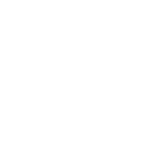

In [15]:
#Cargamos tres subimágenes de cada uno de los tres tipos considerados (el alquitrán no es microplástico)
imgF = cv2.imread('FRA.png') 
imgP = cv2.imread('PEL.png') 
imgT = cv2.imread('TAR.png') 

#Mostramos
plt.subplot(131)
plt.axis("off")
plt.imshow(imgF) 
plt.title('Fragmentos')
plt.subplot(132)
plt.axis("off")
plt.imshow(imgP) 
plt.title('Pellet')
plt.subplot(133)
plt.axis("off")
plt.imshow(imgT) 
plt.title('Alquitrán')

El objetivo de la siguiente tarea, descrita más abajo, es desarrollar tu propio clasificador basado únicamente en heurísticas desde características geométricas y/o de apariencia, para distinguir en las imágenes completas, las partículas de cada tipo, debiendo mostrar la bondad del clasificador haciendo uso de métricas para ello. La siguiente celda obtiene varias métricas para un conjunto de datos imaginario (y con etiquetas aleatorias). Si bien las trataremos con más detalle en teoría, muestro un repertorio de ellas, dando más peso a la matriz de confusión. La ejecución de la celda requiere instalar el paquete scikit-learn.

¿Qué es una matriz de confusión?
Se utiliza para mostrar el comportamiento de un clasificador para las distintas clases conocidas, se relacionan las etiquetas de las muestras anotadas frente a las predichas por el clasificador. Se busca una matriz diagonal, pero la perfección es infrecuente.

El siguiente ejemplo, muestra el modo de obtener la matriz de confusión para un hipotético problema con cuatro clases, y valores de anotación (variable y) y predicción (variable y_pred) obtenidos de forma aleatoria.

Anotaciones  [0, 0, 1, 3, 1, 3, 2, 0, 0, 3, 1, 1, 1, 3, 1, 1, 3, 0, 0, 1, 2, 0, 3, 2, 2, 1, 0, 2, 0, 3, 1, 2, 3, 3, 1, 2, 2, 3, 0, 0, 0, 2, 2, 2, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 3, 3, 3, 2, 0, 0, 1, 1, 1, 0, 3, 0, 1, 2, 3, 3, 0, 1, 0, 3, 0, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 3, 2, 0]
Predicciones  [1, 0, 2, 3, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 3, 2, 2, 0, 3, 0, 1, 2, 3, 2, 1, 3, 0, 2, 0, 2, 2, 0, 2, 3, 1, 1, 2, 3, 0, 3, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 3, 3, 2, 3, 1, 3, 0, 2, 2, 1, 0, 3, 0, 2, 3, 3, 3, 2, 0, 3, 0, 3, 3, 0, 2, 3, 0, 2, 3, 0, 2, 0, 2, 3, 3, 3, 2, 0, 0, 2, 0, 0, 2, 0, 3, 2, 2]
¿Cómo de bien encajan anotación y predicción?
Accuracy (TP/(n))= 0.23
Precision (TP/(TP+FP)) = 0.25811132154882155
Recall (TP/(TP+FN)) = 0.23
F1 Score (2*(precision*recall)/(precision+recall)) = 0.22816605754493957


Text(38.25, 0.5, 'Real/Anotado')

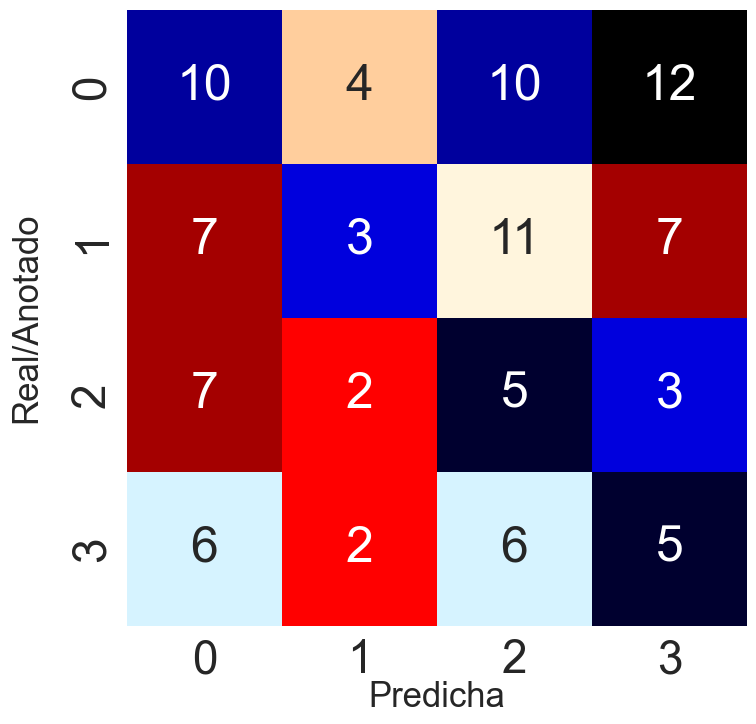

In [16]:

import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


# Numero de muestras
n = 100  
nclases = 4

# A falta de clasificador y conjunto de datos, creamos anotaciones y predicciones de forma aleatoria
# Vector aleatorio con etiquetas anotadas
y = [random.randint(0, nclases - 1) for _ in range(n)]
print('Anotaciones ' , y)

# Vector aleatorio con etiquetas predichas por un supuesto clasificador
y_pred = [random.randint(0, nclases - 1) for _ in range(n)]
print('Predicciones ' , y_pred)

print('¿Cómo de bien encajan anotación y predicción?')

#Cálculo de métricas
accuracy = accuracy_score(y, y_pred)
#Para más de una clase se define la forma de promediar
precision = precision_score(y, y_pred,average='weighted')
recall = recall_score(y, y_pred,average='weighted')
f1score = f1_score(y, y_pred,average='weighted')

print(f"Accuracy (TP/(n))= {accuracy}")
print(f"Precision (TP/(TP+FP)) = {precision}")
print(f"Recall (TP/(TP+FN)) = {recall}")
print(f"F1 Score (2*(precision*recall)/(precision+recall)) = {f1score}")


conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.75)#tamaños tipografía
sns.set(font_scale = 3.0)

ax = sns.heatmap(
        conf_matrix, # confusion matrix 2D array 
        annot=True, # Muestra números en las celdas
        fmt='d', # valores enteros
        cbar=False, # sin barra de colores
        cmap='flag', # mapa de colores
        #vmax=175 # contraste de color
    )

#Etiquetas matriz de confusión
label_font = {'size':'25'}
ax.set_xlabel("Predicha", labelpad=-0.75, fontdict=label_font)
ax.set_ylabel("Real/Anotado", labelpad=20, fontdict=label_font)

TAREA 2: Las tres imágenes cargadas en la celda inicial, han sido extraidas de las imágenes de mayor tamaño presentes en la carpeta. La tarea consiste en extraer características (geométricas y/o visuales) e identificar patrones que permitan distinguir las partículas de cada una de las tres clases, evaluando los aciertos y fallos con las imágenes completas considerando las métricas mostradas y la matriz de confusión. La matriz de confusión, muestra para cada clase el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifican incorrectamente por cada una de las otras dos clases.

En el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas fueron:

- Área en píxeles
- Perímetro en píxeles
- Compacidad (relación entre el cuadrado del perímetro y el área de la partícula)
- Relación del área de la partícula con la del contenedor
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno

Si no se quedan satisfechos con la segmentación obtenida, es el mundo real, también en el README comento técnicas recientes de segmentación, que podrían despertar su curiosidad.

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.preprocessing import StandardScaler

# Cargar imágenes sin redimensionar
imagenes = {
    'fragmentos': cv2.imread('FRA.png'),
    'pellets': cv2.imread('PEL.png'),
    'alquitran': cv2.imread('TAR.png')
}

# Preprocesamiento de imágenes
def procesar_imagen(imagen):
    escala_grises = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    desenfoque = cv2.GaussianBlur(escala_grises, (5, 5), 0)
    _, umbral = cv2.threshold(desenfoque, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return umbral

# Extraer características geométricas y visuales
def obtener_caracteristicas(contorno, imagen_gris):
    # Área y perímetro del contorno
    area = cv2.contourArea(contorno)
    perimetro = cv2.arcLength(contorno, True)
    compacidad = (perimetro ** 2) / area if area != 0 else 0
    
    # Relación área de partícula/área del contenedor
    x, y, w, h = cv2.boundingRect(contorno)
    relacion_area_contenedor = area / (w * h) if w * h != 0 else 0
    
    # Relación ancho-alto (relación de aspecto)
    relacion_aspecto = float(w) / h if h != 0 else 0
    
    # Ajuste elíptico para calcular ejes
    elipse = cv2.fitEllipse(contorno) if len(contorno) >= 5 else None
    eje_mayor = max(elipse[1]) if elipse else 0
    eje_menor = min(elipse[1]) if elipse else 0
    relacion_ejes = eje_mayor / eje_menor if eje_menor != 0 else 0
    
    # Convexidad y solidez
    casco = cv2.convexHull(contorno)
    area_casco = cv2.contourArea(casco)
    solidez = float(area) / area_casco if area_casco != 0 else 0
    
    # Distancias centroide-contorno (máxima y mínima)
    momentos = cv2.moments(contorno)
    if momentos['m00'] != 0:
        cx = int(momentos['m10'] / momentos['m00'])
        cy = int(momentos['m01'] / momentos['m00'])
        distancias = [cv2.pointPolygonTest(contorno, (cx, cy), True) for pt in contorno]
        distancia_max = max(distancias) if distancias else 0
        distancia_min = min(distancias) if distancias else 0
        relacion_distancias = distancia_min / distancia_max if distancia_max != 0 else 0
    else:
        relacion_distancias = 0
    
    # Características de textura (histograma reducido a 16 bins)
    mascara = np.zeros(imagen_gris.shape, dtype="uint8")
    cv2.drawContours(mascara, [contorno], -1, 255, -1)
    region_mascara = cv2.bitwise_and(imagen_gris, imagen_gris, mask=mascara)
    histograma = cv2.calcHist([region_mascara], [0], mascara, [16], [0, 256])  # Histograma con 16 bins
    histograma = cv2.normalize(histograma, histograma).flatten()
    
    # Devolver todas las características
    return [area, perimetro, compacidad, relacion_area_contenedor, 
            relacion_aspecto, relacion_ejes, solidez, relacion_distancias] + histograma.tolist()

# Aumento de datos
def aumento_datos(imagen):
    return [
        imagen,
        cv2.flip(imagen, 1),  # Volteo horizontal
        cv2.warpAffine(imagen, cv2.getRotationMatrix2D((imagen.shape[1] // 2, imagen.shape[0] // 2), 15, 1), 
                       (imagen.shape[1], imagen.shape[0])),  # Rotación +15 grados
        cv2.warpAffine(imagen, cv2.getRotationMatrix2D((imagen.shape[1] // 2, imagen.shape[0] // 2), -15, 1), 
                       (imagen.shape[1], imagen.shape[0])),  # Rotación -15 grados
        cv2.convertScaleAbs(imagen, alpha=1.2),  # Ajuste de brillo
        cv2.convertScaleAbs(imagen, alpha=0.8),  # Ajuste de brillo
        cv2.GaussianBlur(imagen, (5, 5), 0)  # Desenfoque
    ]

# Procesamiento de imágenes y extracción de características
def procesar_y_extraer_caracteristicas(etiqueta, imagen):
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    umbral = procesar_imagen(imagen)
    contornos, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    data = []

    etiquetas = []
    for contorno in contornos:
        if cv2.contourArea(contorno) > 5:
            caracteristicas = obtener_caracteristicas(contorno, imagen_gris)
            data.append(caracteristicas)
            etiquetas.append(etiqueta)
    
    return data, etiquetas

# Aumentación y procesamiento de imágenes
resultados = []
for etiqueta, imagen in imagenes.items():
    imagenes_aumentadas = aumento_datos(imagen)
    for imagen_aug in imagenes_aumentadas:
        resultados.append(procesar_y_extraer_caracteristicas(etiqueta, imagen_aug))

# Unir datos y etiquetas
datos = [item for sublista in resultados for item in sublista[0]]
etiquetas = [item for sublista in resultados for item in sublista[1]]

# Crear un DataFrame
columnas = ['Area', 'Perimetro', 'Compacidad', 'Rel_Area_Contenedor', 'Rel_Aspecto', 
            'Rel_Ejes', 'Solidez', 'Rel_Distancias'] + [f'Hist_{i}' for i in range(16)]
df = pd.DataFrame(datos, columns=columnas)
df['Etiqueta'] = etiquetas

# Separar los datos en conjunto de entrenamiento y prueba
X = df.drop('Etiqueta', axis=1)
y = df['Etiqueta']
X_entrenar, X_prueba, y_entrenar, y_prueba = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_entrenar, y_entrenar)

# Predecir y evaluar el modelo
y_pred = modelo_rf.predict(X_prueba)
matriz_de_confusion = confusion_matrix(y_prueba, y_pred)
informe_clasificacion = classification_report(y_prueba, y_pred, output_dict=True)

# Mostrar matriz de confusión
plt.figure(figsize=(10, 10))
sns.heatmap(matriz_de_confusion, annot=True, fmt='d', cmap='Greens',cbar=False, xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar métricas por clase
print("\nInforme de Clasificación:")
for clase, metricas in informe_clasificacion.items():
    if isinstance(metricas, dict):  # Evitar los promedios globales
        print(f"Clase: {clase}")
        print(f"  Precisión: {metricas['precision']:.2f}")
        print(f"  Recall: {metricas['recall']:.2f}")
        print(f"  F1-Score: {metricas['f1-score']:.2f}\n")

[ WARN:0@1920.966] global loadsave.cpp:241 findDecoder imread_('FRA.png'): can't open/read file: check file path/integrity
[ WARN:0@1920.966] global loadsave.cpp:241 findDecoder imread_('PEL.png'): can't open/read file: check file path/integrity
[ WARN:0@1920.966] global loadsave.cpp:241 findDecoder imread_('TAR.png'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'